Meshkov Alexandr

In [1]:
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
!wget -O data.csv https://www.dropbox.com/s/j4r325mgj23lenj/test.csv?dl=0 
test_file = "data.csv"

--2021-04-24 21:53:47--  https://www.dropbox.com/s/j4r325mgj23lenj/test.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6028:18::a27d:4712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/j4r325mgj23lenj/test.csv [following]
--2021-04-24 21:53:48--  https://www.dropbox.com/s/raw/j4r325mgj23lenj/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceb0cec2395776f88d60852ea8c.dl.dropboxusercontent.com/cd/0/inline/BNOIHJYzA6_oCFWBiUYh0aLKVKUrSud-d2ZzHSXpEKXcXHojYl8w4iFUGPKZcIKZQE5bmxWBc9WbsjjzsJIIH25lNV4rufDCcR4lZ8aBEV3PV4p3GSmlMgoWC0ksg8aOoMsiaP5dDvGZSNt1ZQrR5mnw/file# [following]
--2021-04-24 21:53:48--  https://uceb0cec2395776f88d60852ea8c.dl.dropboxusercontent.com/cd/0/inline/BNOIHJYzA6_oCFWBiUYh0aLKVKUrSud-d2ZzHSXpEKXcXHojYl8w4iFUGPKZcIKZQE5bmxWBc9WbsjjzsJIIH25lNV4ruf

In [41]:

raw_data = '''
20,20	10,10	0,0 10,0 0,10 10,10
20,25	10,10	0,0 10,0 0,10 10,10
25,20	10,10	0,0 10,0 0,10 10,10
25,25	10,10	0,0 10,0 0,10 10,10
'''


class Pos:
    def __init__(self, *arr):
        assert len(arr) == 2
        self.xy = arr
    
    def __add__(self, that):
        return [a + b for a, b in zip(self.xy, that.xy)]
    
    def __sub__(self, that):
        return [a - b for a, b in zip(self.xy, that.xy)]
    
    def __neg__(self):
        return [-a for a in self.xy]
    
    def __str__(self):
        return str(self.xy)
    
    def __repr__(self):
        return str(self)
    
    def parse(s):
        arr = [int(a) for a in s.split(',')]
        return Pos(*arr)


class Box:
    def __init__(self, line):
        arr = line.split('\t')
        self.pos = Pos.parse(arr[0])
        self.size = Pos.parse(arr[1])
        self.offsets = [Pos.parse(pos) for pos in arr[2].split(' ')]
        assert len(self.offsets) > 0
    
    def __str__(self):
        return 'Box(pos={}, size={}, offsets={})'.format(self.pos, self.size, self.offsets)
    
    def __repr__(self):
        return str(self)


boxes = [Box(line) for line in raw_data.strip().split('\n')]
print(boxes)


[Box(pos=(20, 20), size=(10, 10), offsets=[(0, 0), (10, 0), (0, 10), (10, 10)]), Box(pos=(20, 25), size=(10, 10), offsets=[(0, 0), (10, 0), (0, 10), (10, 10)]), Box(pos=(25, 20), size=(10, 10), offsets=[(0, 0), (10, 0), (0, 10), (10, 10)]), Box(pos=(25, 25), size=(10, 10), offsets=[(0, 0), (10, 0), (0, 10), (10, 10)])]


In [21]:
boxes[0].offsets[2][0]

(0, 10)

In [2]:
#Парсинг
import csv
data = []
labels_x = []
labels_y = []
labels_placement_x = []
labels_placement_y = []
labels_width = []
labels_height = []

with open(test_file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        for elem in row:
            data.append(elem)
N = int(data[0])
for i in range(1, N + 1):
    labels_x.append(int(data[i]))
for i in range(N + 1, N*2 + 1):
    labels_y.append(int(data[i]))
for first, second in zip(range(N*2 + 1, N*3 + 1), range(N*4 + 1, N*5 + 1)):
    labels_placement_x.append([int(data[first]), int(data[second])])
for first, second in zip(range(N*3 + 1, N*4 + 1), range(N*5 + 1, N*6 + 1)):
    labels_placement_y.append([int(data[first]), int(data[second])])
for first, second in zip(range(N*6 + 1, N*7 + 1), range(N*7 + 1, N*8 + 1)):
    labels_width.append(int(data[first]))
    labels_height.append(int(data[second]))

Данные принимаются в виде файла .csv, в котором они расположены в следующем порядке:

В первой строке число N - количество точек

Во второй строке последовательность координат "x" каждой точки (разделенные запятой)

В третьей строке последовательность координат "y" каждой точки (разделенные запятой)

В четвертой строке последовательность координат "x" левого нижнего угла лэйбла (прямоугольника) в системе отсчета, связанной с точкой для первого варианта расположения лэйбла.(разделенные запятой)

В пятой строке последовательность координат "y" левого нижнего угла лэйбла (прямоугольника) в системе отсчета, связанной с точкой для первого варианта расположения лэйбла.(разделенные запятой)

В шестой строке последовательность координат "x" левого нижнего угла лэйбла (прямоугольника) в системе отсчета, связанной с точкой для второго варианта расположения лэйбла.(разделенные запятой)

В седьмой строке последовательность координат "y" левого нижнего угла лэйбла (прямоугольника) в системе отсчета, связанной с точкой для второго варианта расположения лэйбла.(разделенные запятой)

В восьмой строке последовательность значений ширины для каждого лэйбла (разделенные запятой)

В девятой строке последовательность значений высоты для каждого лэйбла (разделенные запятой)



In [79]:
class label_box:
    def __init__(self, line):
        arr = line.split('\t')
        self.offsets = [Pos.parse(pos) for pos in arr[2].split(' ')]
        self.pos = Pos.parse(arr[0])
        self.x = self.pos.xy[0] + self.offsets[1].xy[0] # + labels_placement_x
        self.y = self.pos.xy[1] + self.offsets[1].xy[1] # + labels_placement_y
        self.width = Pos.parse(arr[1]).xy[0]
        self.height = Pos.parse(arr[1]).xy[1]
        
labels_list = [label_box(line) for line in raw_data.strip().split('\n')]

In [80]:
# class label:
#     def __init__(self, label_x, label_y, labels_width, labels_height,
#                  labels_placement_x, labels_placement_y):
#         self.x = label_x + labels_placement_x
#         self.y = label_y + labels_placement_y
#         self.width = labels_width
#         self.height = labels_height
# labels_list = []
# for i in range(N):
#     for var in [0,1]:
#         labels_list.append(label(labels_x[i], labels_y[i],labels_width[i],labels_height[i],labels_placement_x[i][var],labels_placement_y[i][var]))

In [81]:
labels_list

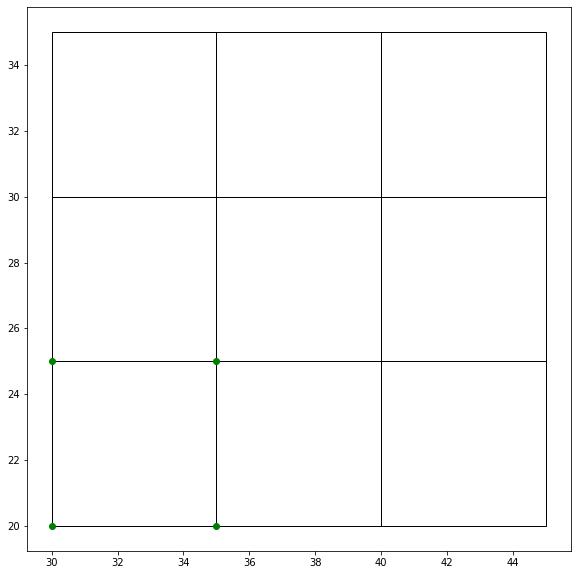

In [86]:
var = 0
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, aspect='equal')

# plt.xlim(0, 500)
# plt.ylim(0, 500)

# for i in range(N): 
#     ax.plot(labels_x[i] , labels_y[i], 'go')
#     ax.add_patch(patches.Rectangle((labels_x[i] + labels_placement_x[i][var], 
#                                     labels_y[i] + labels_placement_y[i][var]),
#                                labels_width[i],labels_height[i],fill=False)) 
for i in range(len(labels_list)): 
    ax.plot(labels_list[i].x , labels_list[i].y, 'go')
    ax.add_patch(patches.Rectangle((labels_list[i].x + labels_list[i].offsets[0].xy[0], 
                                    labels_list[i].y + labels_list[i].offsets[0].xy[1]),
                               labels_list[i].width, labels_list[i].height, fill=False)) 

In [88]:
import networkx as nx
G=nx.DiGraph()

def intersect(label1, label2):
    if (label1.y + label1.height < label2.y) or (label2.y + label2.height < label1.y) or (label1.x + label1.width < label2.x) or (label2.x + label2.width < label1.x):
        return False
    return True

for i in range(N):
    G.add_node(str(i))
    G.add_node("no" + str(i))

N = len(labels_list)
cross = []
for i in range(N):
    for k in range(N):
        if i != k and intersect(labels_list[i], labels_list[k]):
            cross.append([i,k])
cross_unique = set()

for elem in cross:
    elem.sort()
    elem_frozen = tuple(elem)
    if (elem[1] - elem[0] == 1) and  (elem[0] // 2 == elem[1] // 2):
        continue
    cross_unique.add(elem_frozen)

for elem in cross_unique:
    node1 = elem[0] // 2
    no_node1 = elem[0] % 2
    node2 = elem[1] // 2
    no_node2 = elem[1] % 2
    if no_node1 == 0 and no_node2 == 0:
        G.add_edge(str(node1), "no" + str(node2))
        G.add_edge(str(node2), "no" + str(node1))
    if no_node1 == 1 and no_node2 == 0:
        G.add_edge("no" + str(node1), "no" + str(node2))
        G.add_edge(str(node2),  str(node1))
    if no_node1 == 1 and no_node2 == 1:
        G.add_edge("no" + str(node1), str(node2))
        G.add_edge("no" + str(node2), str(node1))
    if no_node1 == 0 and no_node2 == 1:
        G.add_edge(str(node1), str(node2))
        G.add_edge("no" + str(node2), "no" + str(node1))

NetworkXError: random_state_index is incorrect

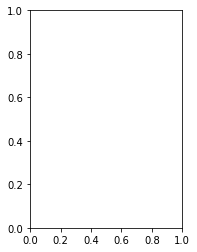

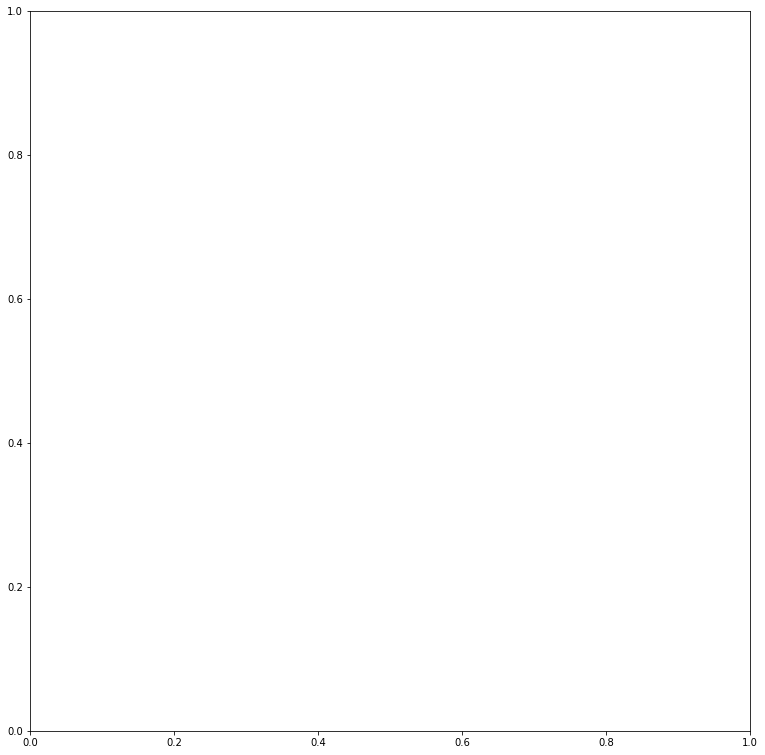

In [89]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold')

In [8]:
comp = {}
counter = 0
node_var = {}
solution_exists = True
for s in nx.strongly_connected_components(G):
    for node in s:
        comp[node] = counter
    counter += 1
for i in range(N):
    if comp[str(i)] == comp["no" + str(i)]:
        print("no solution")
        solution_exists = False
for i in range(N):
    if comp[str(i)] > comp["no" + str(i)]:
        node_var[i] = 1
    else:
        node_var[i] = 0

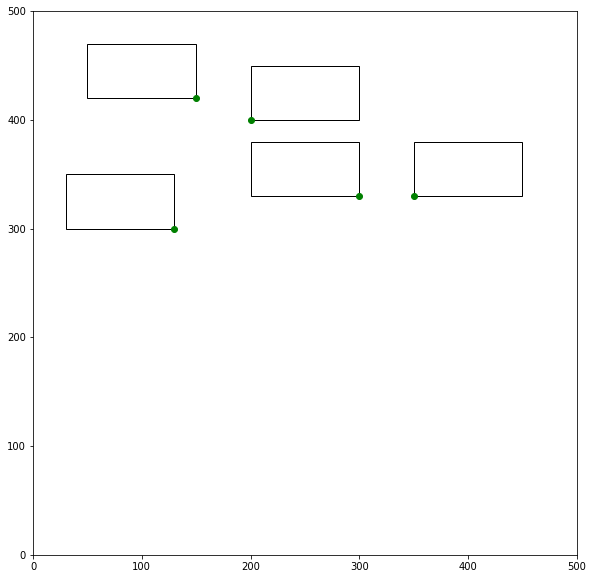

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

if solution_exists:
  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(111, aspect='equal')

  plt.xlim(0, 500)
  plt.ylim(0, 500)

  for i in range(N): 
      ax.plot(labels_x[i] , labels_y[i], 'go')
      ax.add_patch(patches.Rectangle((labels_x[i] + labels_placement_x[i][node_var[i]], 
                                     labels_y[i] + labels_placement_y[i][node_var[i]]),
                                 labels_width[i],labels_height[i],fill=False))
else: print("no solution!") 